In [1]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score


In [5]:
df = pd.read_csv('/kaggle/input/nyse/prices.csv')

In [6]:
df.head(3)

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0


In [7]:
df.shape

(851264, 7)

In [8]:
df = df.drop(columns=['date','symbol'])

In [9]:
df.head()

,open,close,low,high,volume
0,123.430000,125.839996,122.309998,126.250000,2163600.0
1,125.239998,119.980003,119.940002,125.540001,2386400.0
2,116.379997,114.949997,114.930000,119.739998,2489500.0
3,115.480003,116.620003,113.500000,117.440002,2006300.0
4,117.010002,114.970001,114.089996,117.330002,1408600.0


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score


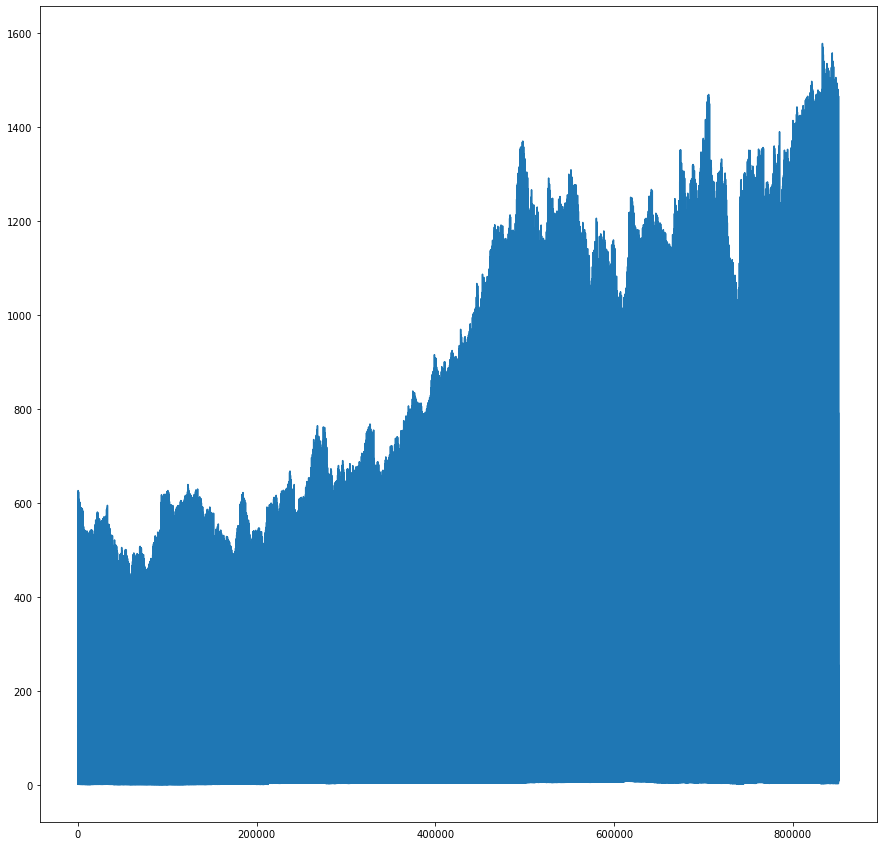

In [11]:
plt.figure(figsize=(15,15))
plt.plot(df['close'])

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)   #Jadi numpy array, tidak lagi pandas

y_close = df[:,1]



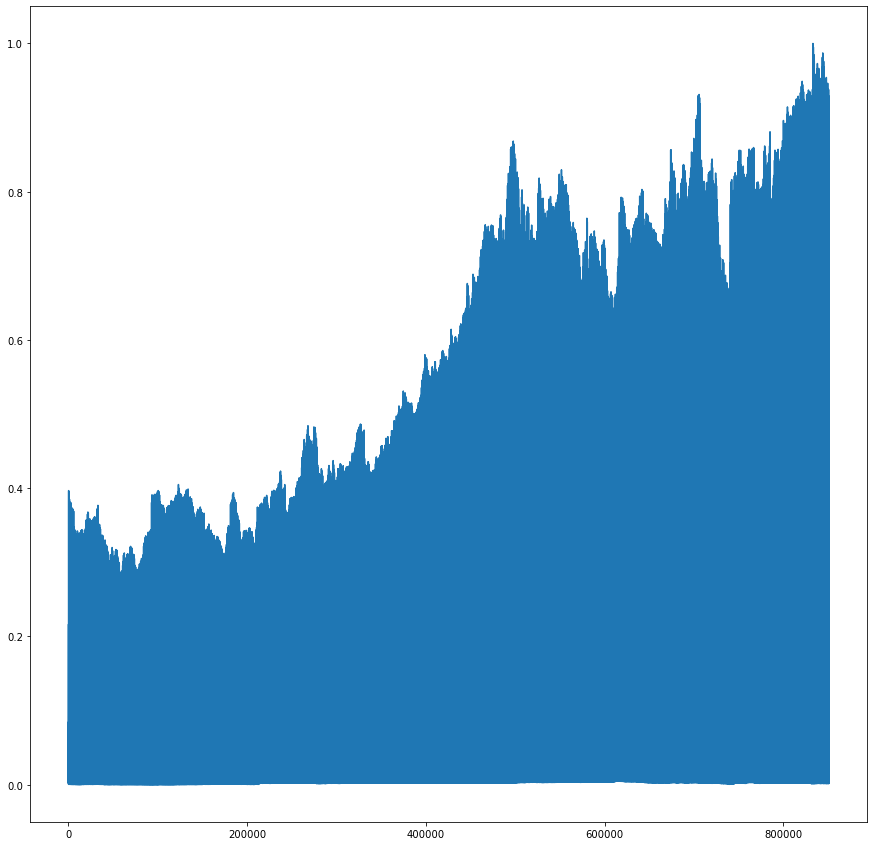

In [13]:
plt.figure(figsize=(15,15))
plt.plot(y_close)
plt.show()

In [14]:
ntrain = int(len(y_close)*0.8) 

train = df[0:ntrain]
test  = df[ntrain:len(df)]

y_close_train = y_close[0:ntrain]
y_close_test  = y_close[ntrain:len(y_close)]

In [15]:
y_close_test.shape

(170253,)

In [16]:
import numpy as np

def to_sequences(seq_size, data,close):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        window = data[i:(i+seq_size)]
        after_window = close[i+seq_size]
        window = [[x] for x in window]
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)


timesteps = 10

x_train, y_train = to_sequences(timesteps, train, y_close_train)
x_test, y_test   = to_sequences(timesteps, test, y_close_test)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (681000, 10, 1, 5)
Shape of x_test: (170242, 10, 1, 5)
Shape of y_train: (681000,)
Shape of y_test: (170242,)


In [17]:
x_train[0]

array([[[0.0774064 , 0.07923817, 0.07841922, 0.0783538 , 0.00251686]],

       [[0.07854937, 0.0755229 , 0.07688931, 0.07791006, 0.00277603]],

       [[0.07295449, 0.07233384, 0.0736552 , 0.07428517, 0.00289597]],

       [[0.07238617, 0.07339264, 0.07273209, 0.07284772, 0.00233387]],

       [[0.07335232, 0.07234652, 0.07311295, 0.07277897, 0.00163859]],

       [[0.07240511, 0.07271425, 0.07337762, 0.07198525, 0.00127727]],

       [[0.07300501, 0.07100243, 0.07214465, 0.07261648, 0.00110464]],

       [[0.07114216, 0.07197246, 0.070505  , 0.07134152, 0.00091352]],

       [[0.07102849, 0.07079955, 0.07171215, 0.07124777, 0.00127227]],

       [[0.07123688, 0.06943643, 0.07038881, 0.0718665 , 0.00177225]]])

In [18]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[2], x_train.shape[1],x_train.shape[3]))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[2],x_test.shape[1],x_test.shape[3]))

In [19]:
print(x_train.shape)

(681000, 1, 10, 5)


In [20]:
x_train[0][0].shape

(10, 5)

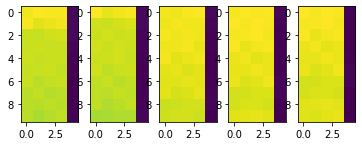

In [21]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
ax1.imshow(x_train[0][0])
ax2.imshow(x_train[1][0])
ax3.imshow(x_train[2][0])
ax4.imshow(x_train[3][0])
ax5.imshow(x_train[4][0])

# CNN Model

In [22]:
import numpy as np
import pandas as pd

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.optimizers import Adam
from keras.layers import Conv1D, Conv2D, MaxPooling2D
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
import csv
import collections
from scipy.stats import zscore
from datetime import datetime
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [23]:
cnn = Sequential()
cnn.add(Conv2D(8, kernel_size = (1, 2), strides = (1, 1),  padding = 'valid', 
               activation = 'relu', input_shape = (1,10,5)))
cnn.add(MaxPooling2D(pool_size = (1,2)))

cnn.add(Flatten())
cnn.add(Dense(64, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation="relu"))
cnn.summary()   



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 9, 8)           88        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 4, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,265
Trainable params: 2,265
Non-trainable params: 0
____________________________________________________

In [24]:
cnn.compile(loss='mean_squared_error', optimizer='nadam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1, patience=2, verbose=2, mode='auto') 
checkpointer = ModelCheckpoint(filepath="CNN_Parameters.hdf5", verbose=0, save_best_only=True) # save best model

In [25]:
history = cnn.fit(x_train,y_train,validation_split=0.2,batch_size = 128, callbacks=[checkpointer],verbose=1,epochs = 100)

Train on 544800 samples, validate on 136200 samples
Epoch 1/100
544800/544800 [==============================] - 13s 23us/step - loss: 0.0016 - val_loss: 0.0023
Epoch 2/100
544800/544800 [==============================] - 12s 22us/step - loss: 0.0011 - val_loss: 0.0025
Epoch 3/100
544800/544800 [==============================] - 12s 23us/step - loss: 9.8879e-04 - val_loss: 0.0019
Epoch 4/100
544800/544800 [==============================] - 12s 23us/step - loss: 9.4557e-04 - val_loss: 0.0018
Epoch 5/100
544800/544800 [==============================] - 12s 22us/step - loss: 9.2688e-04 - val_loss: 0.0021
Epoch 6/100
544800/544800 [==============================] - 12s 22us/step - loss: 9.0364e-04 - val_loss: 0.0024
Epoch 7/100
544800/544800 [==============================] - 12s 22us/step - loss: 8.8955e-04 - val_loss: 0.0021
Epoch 8/100
544800/544800 [==============================] - 12s 22us/step - loss: 8.9244e-04 - val_loss: 0.0021
Epoch 9/100
544800/544800 [=========================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



544800/544800 [==============================] - 12s 21us/step - loss: 8.2764e-04 - val_loss: 0.0022
Epoch 23/100
544800/544800 [==============================] - 12s 22us/step - loss: 8.2846e-04 - val_loss: 0.0021
Epoch 24/100
544800/544800 [==============================] - 12s 21us/step - loss: 8.2066e-04 - val_loss: 0.0021
Epoch 25/100
544800/544800 [==============================] - 12s 21us/step - loss: 8.1911e-04 - val_loss: 0.0021
Epoch 26/100
544800/544800 [==============================] - 11s 21us/step - loss: 8.2256e-04 - val_loss: 0.0023
Epoch 27/100
544800/544800 [==============================] - 12s 21us/step - loss: 8.2241e-04 - val_loss: 0.0021
Epoch 28/100
544800/544800 [==============================] - 12s 21us/step - loss: 8.1319e-04 - val_loss: 0.0024
Epoch 29/100
544800/544800 [==============================] - 12s 21us/step - loss: 8.1353e-04 - val_loss: 0.0024
Epoch 30/100
544800/544800 [==============================] - 12s 21us/step - loss: 8.2542e-04 - val_

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



544800/544800 [==============================] - 12s 21us/step - loss: 8.0568e-04 - val_loss: 0.0021
Epoch 44/100
544800/544800 [==============================] - 11s 21us/step - loss: 8.0048e-04 - val_loss: 0.0022
Epoch 45/100
544800/544800 [==============================] - 12s 21us/step - loss: 7.9454e-04 - val_loss: 0.0022
Epoch 46/100
544800/544800 [==============================] - 12s 21us/step - loss: 7.9989e-04 - val_loss: 0.0021
Epoch 47/100
544800/544800 [==============================] - 11s 21us/step - loss: 7.9188e-04 - val_loss: 0.0023
Epoch 48/100
544800/544800 [==============================] - 11s 21us/step - loss: 8.0525e-04 - val_loss: 0.0020
Epoch 49/100
544800/544800 [==============================] - 11s 21us/step - loss: 7.9871e-04 - val_loss: 0.0023
Epoch 50/100
544800/544800 [==============================] - 11s 21us/step - loss: 7.9839e-04 - val_loss: 0.0021
Epoch 51/100
544800/544800 [==============================] - 12s 21us/step - loss: 8.0101e-04 - val_

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



544800/544800 [==============================] - 12s 21us/step - loss: 7.8980e-04 - val_loss: 0.0021
Epoch 61/100
544800/544800 [==============================] - 11s 21us/step - loss: 7.8463e-04 - val_loss: 0.0021
Epoch 62/100
544800/544800 [==============================] - 12s 21us/step - loss: 7.9008e-04 - val_loss: 0.0023
Epoch 63/100
544800/544800 [==============================] - 12s 22us/step - loss: 8.0072e-04 - val_loss: 0.0021
Epoch 64/100
544800/544800 [==============================] - 12s 23us/step - loss: 7.8833e-04 - val_loss: 0.0021
Epoch 65/100
544800/544800 [==============================] - 12s 23us/step - loss: 7.9332e-04 - val_loss: 0.0023
Epoch 66/100
544800/544800 [==============================] - 13s 24us/step - loss: 7.9705e-04 - val_loss: 0.0021
Epoch 67/100
544800/544800 [==============================] - 12s 23us/step - loss: 7.9867e-04 - val_loss: 0.0022
Epoch 68/100
544800/544800 [==============================] - 12s 22us/step - loss: 7.9016e-04 - val_

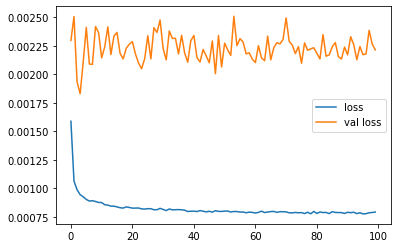

In [26]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()

In [27]:
cnn.load_weights('CNN_Parameters.hdf5')

pred = cnn.predict(x_test)
print(pred.shape)

(170242, 1)


In [28]:
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("RMSE Score: {}".format(score))

RMSE Score: 0.05613838834869225


/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


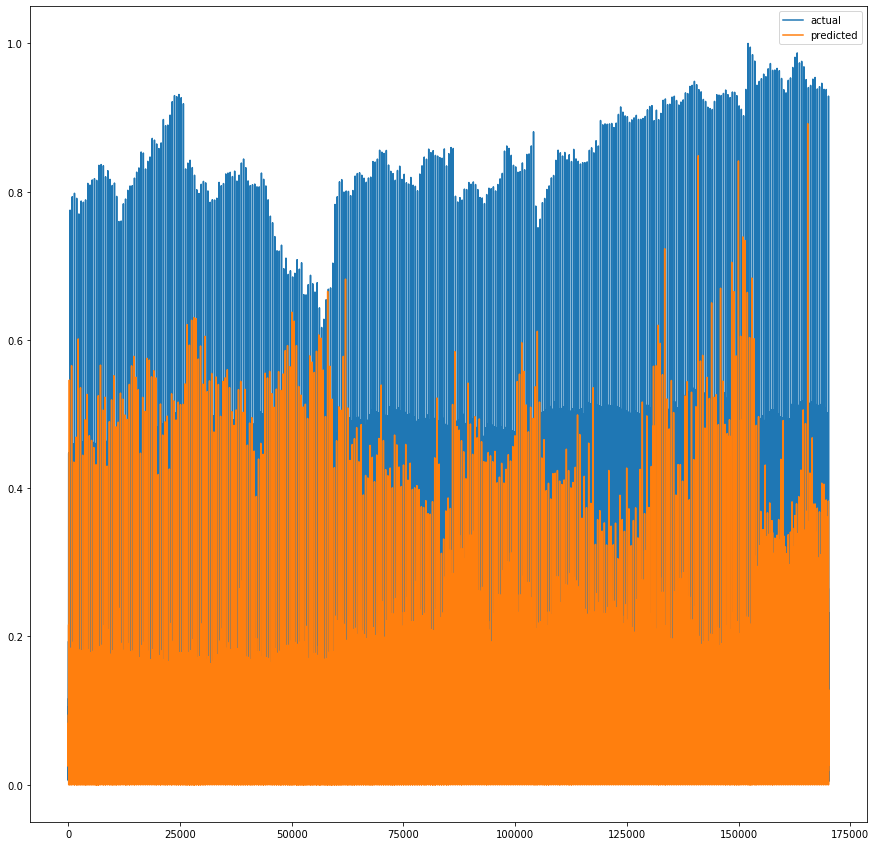

In [29]:
plt.figure(figsize=(15,15))

plt.plot(y_test, label = 'actual')
plt.plot(pred,   label = 'predicted')
plt.legend()
plt.show()